# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive
import seaborn as sns     
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['02', '03']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-02-01 00:06:58   2022-02-01 00:19:24              1.0   
1         1  2022-02-01 00:38:22   2022-02-01 00:55:55              1.0   
2         1  2022-02-01 00:03:20   2022-02-01 00:26:59              1.0   
3         2  2022-02-01 00:08:00   2022-02-01 00:28:05              1.0   
4         2  2022-02-01 00:06:48   2022-02-01 00:33:07              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           5.40         1.0                  N           138           252   
1           6.40         1.0                  N           138            41   
2          12.50         1.0                  N           138           200   
3           9.88         1.0                  N           239           200   
4          12.16         1.0                  N           138           125   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0   1.75      0.5        3.90          0.00   
1             2         21.0   1.75      0.5        0.00          6.55   
2             2         35.5   1.75      0.5        0.00          6.55   
3             2         28.0   0.50      0.5        0.00          3.00   
4             1         35.5   0.50      0.5        8.11          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         23.45                   0.0         1.25  
1                    0.3         30.10                   0.0         1.25  
2                    0.3         44.60                   0.0         1.25  
3                    0.3         34.80                   2.5         0.00  
4                    0.3         48.66                   2.5         1.25

In [4]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-02-01 00:20:21   2022-02-01 00:24:30                  N   
1         2  2022-02-01 00:32:26   2022-02-01 00:35:31                  N   
2         1  2022-02-01 00:17:27   2022-02-01 00:44:44                  N   
3         2  2022-02-01 00:45:37   2022-02-01 01:27:16                  N   
4         2  2022-02-01 00:06:46   2022-02-01 00:30:06                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           238              1.0           1.16   
1         1.0           166            24              1.0           0.57   
2         1.0           226           219              1.0           0.00   
3         1.0            89            83              1.0          16.62   
4         1.0             7           238              1.0           5.97   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          5.5    0.5      0.5        1.02           0.0      None   
1          4.5    0.5      0.5        0.00           0.0      None   
2         42.2    0.0      0.5        0.00           0.0      None   
3         49.0    0.5      0.5        0.00           0.0      None   
4         21.0    0.5      0.5        4.50           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          7.82           1.0        1.0   
1                    0.3          5.80           2.0        1.0   
2                    0.3         43.00           1.0        1.0   
3                    0.3         50.30           2.0        1.0   
4                    0.3         29.55           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  2.75

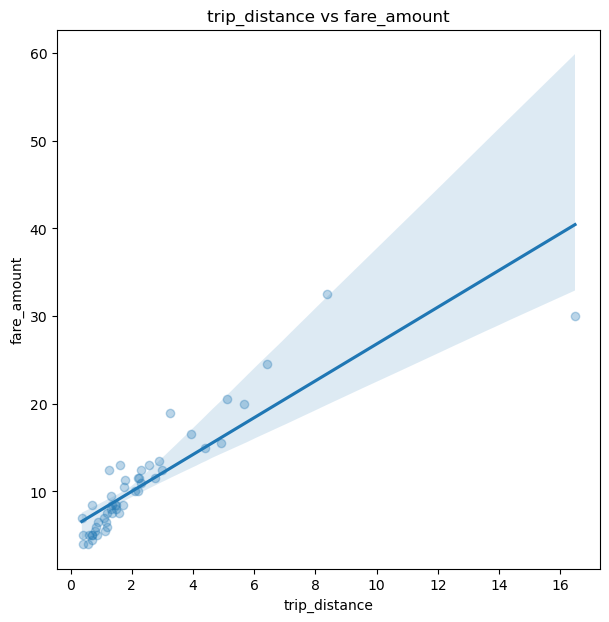

In [5]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [6]:
df_yellow['fare_amount'].describe()

count    6.607313e+06
mean     1.357176e+01
std      1.270123e+01
min     -8.950000e+02
25%      7.000000e+00
50%      9.500000e+00
75%      1.500000e+01
max      1.777000e+03
Name: fare_amount, dtype: float64

We wish to view the distribution of distance, fares and passenger count - we use the describe() function
since it will give us a brief overview of the distribution. The describe() function shows basic statistical 
characteristics of each numerical feature (int64 and float64 types). To see what type the different columns
have, we use the info() function - If one wishes to conduct describe() on non-numerical columns one simply
needs to add the data type (Dtype in .info())
For yellow & green taxis

In [7]:
df_yellow['trip_distance'].describe(); df_yellow['fare_amount'].describe(); df_yellow['passenger_count'].describe()
df_green['trip_distance'].describe(); df_green['fare_amount'].describe(); df_green['passenger_count'].describe()


count    132450.000000
mean          1.283549
std           0.925565
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

We remove data that we deem to be incorrect such as very low trip distance and trips with 0 and NULL passengers
We remove trip distance above 20 to remove outliers for yellow and green - We also do not wish to have trips 
that results in the taxi owing money to the passenger and therefore we remove any trip with a fare amount below 0


In [8]:
df_yellow.drop(df_yellow[df_yellow['trip_distance'] < 1].index, inplace = True)
df_yellow.drop(df_yellow[df_yellow['passenger_count'] == 0].index, inplace = True)
df_yellow.drop(df_yellow[df_yellow['trip_distance'] > 20 ].index, inplace = True)
df_yellow.drop(df_yellow[df_yellow['fare_amount'] <0 ].index, inplace = True)
# We drop all NA values
df_yellow=df_yellow.dropna()
df_green.drop(df_green[df_green['trip_distance'] < 1].index, inplace = True)
df_green.drop(df_green[df_green['passenger_count'] == 0].index, inplace = True)
df_green.drop(df_green[df_green['trip_distance'] > 20 ].index, inplace = True)
df_green.drop(df_green[df_green['fare_amount'] < 0 ].index, inplace = True)
# We drop all NA values
df_green=df_green[df_green.passenger_count.notnull()]

We now wish to look for any relationship or correlation between the 3 different columns
We use the groupby() function for this end, since it allows us to compare multiple columns
In our case we are going to compare them 2 and 2
for yellow and green taxis

In [9]:
df_yellow.groupby('passenger_count')['fare_amount'].mean()
df_yellow.groupby('passenger_count')['trip_distance'].mean()
df_yellow.groupby('trip_distance')['fare_amount'].mean() 
df_green.groupby('passenger_count')['fare_amount'].mean()
df_green.groupby('passenger_count')['trip_distance'].mean()
df_green.groupby('trip_distance')['fare_amount'].mean() 

trip_distance
1.00      6.495344
1.01      6.426621
1.02      6.640411
1.03      6.681655
1.04      6.663830
           ...    
19.93    64.500000
19.95    45.000000
19.98    67.500000
19.99    61.500000
20.00    53.000000
Name: fare_amount, Length: 1718, dtype: float64

In [10]:
# As expected due to the large amount of unique trip_distance and fare_amount points
df_green['passenger_count'].nunique(); df_green['fare_amount'].nunique(); df_green['trip_distance'].nunique()
# 10 ; 3670 ; 2349

1718

The groupby() function does not give a satisfying results, therefore we use to use the .corr. Normally this 
function finds the overall correlation between the entire dataframe, however we are not interested in that.
Therefore, we limit it to the 2 columns of trip_distance and fare_amount
for yellow and green taxis

We remember that linear correlation goes from +1 to -1; +1 being perfect correlation between the 2 columns/samples
and 0 being no correlation between them; -1 being negativ correlation meaning.
It can be observed that there is no meaningfull correlation between any of the 3 combinations

In [11]:


df_yellow['passenger_count'].corr(df_yellow['fare_amount']) # 0.02245
df_yellow['passenger_count'].corr(df_yellow['trip_distance']) # 0.0219
df_yellow['trip_distance'].corr(df_yellow['fare_amount']) # 0.9534
df_green['passenger_count'].corr(df_green['fare_amount']) # 0.0279
df_green['passenger_count'].corr(df_green['trip_distance']) # 0.0219
df_green['trip_distance'].corr(df_green['fare_amount']) # 0.881

0.876891672308775

We wish to observe wether or not these two taxis are "stealing" customers from each other
There is no true correlation between them - therefore they have no direct competition

In [12]:
df_green['passenger_count'].corr(df_yellow['passenger_count']) # -0.0012


0.0020875747202064835

We wish to find the distribution of passenger_count, fare_amount og trip_distance

In [13]:
print(df_yellow.groupby('passenger_count')['fare_amount'].sum())
print(df_yellow.groupby('passenger_count')['trip_distance'].sum())


passenger_count
1.0    42043756.45
2.0     9077342.08
3.0     2225646.63
4.0      923606.84
5.0     1147265.35
6.0      790879.95
7.0          81.00
8.0         240.00
Name: fare_amount, dtype: float64
passenger_count
1.0    10370180.90
2.0     2312019.97
3.0      554592.33
4.0      231033.72
5.0      286317.41
6.0      197195.69
7.0          10.64
8.0          26.13
Name: trip_distance, dtype: float64


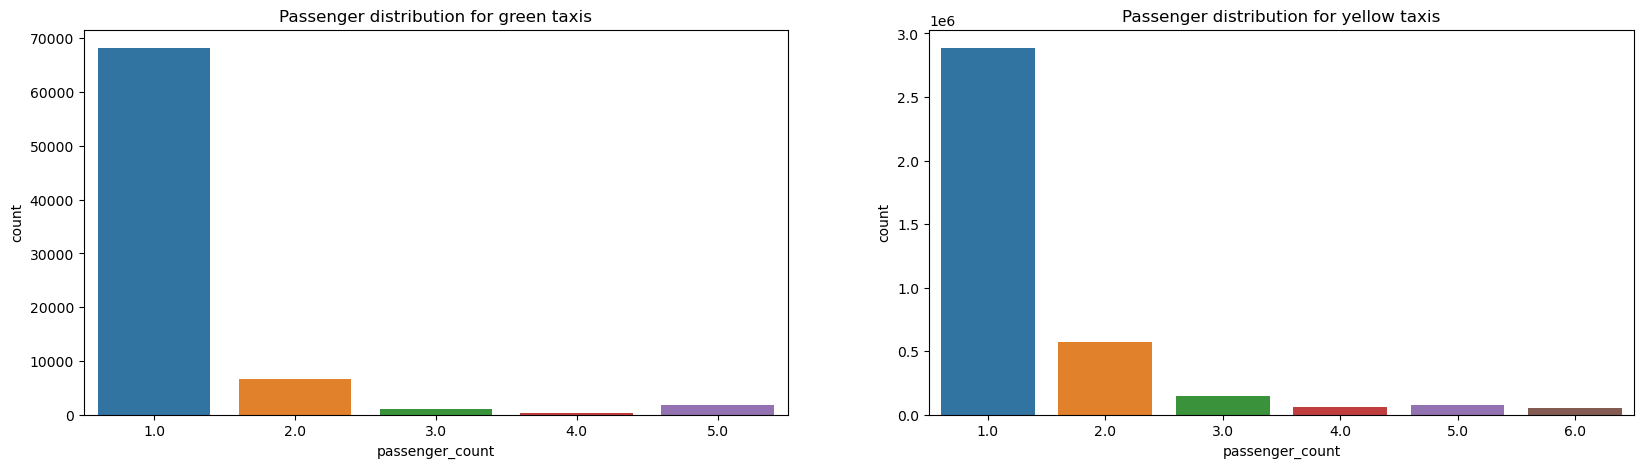

In [14]:
# Remove trips with more than either 5 or 6 passengers, because there is only 4 trips in total - this is done to make graphs look nicer
df_green=df_green[df_green['passenger_count']<=5]
df_yellow=df_yellow[df_yellow['passenger_count']<=6]
# We wish to create a histrogram for the distribution 
figure,(GQ,YQ)=plt.subplots(ncols=2,figsize=(20,5))
YQ.set_title('Passenger distribution for yellow taxis')
ax=sns.countplot(x='passenger_count',data=df_yellow,ax=YQ)
GQ.set_title('Passenger distribution for green taxis')
ax=sns.countplot(x='passenger_count',data=df_green,ax=GQ)



### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

Load an empty map
We wish to have a visual map of the distribution of the locations of the latitude & longitude for this purpose
we use the keplerg1 package
The dots have the following values: 
purple: 0.01 to 0.05; dark red: 0.05 to 0.06; red: 0.06 to 0.08; Orange: 0.08 to 0.11; 
light Orange: 0.11 to 0.14; yellow: 0.14 to 0.43
we wish to graph the distance per zones 
We can observe that there is a large density of taxi usage in Manhattan area - this may be due to the density 
of the population in that area, aswell as the multiple hospitals and bars that reside there. During
emergencies people are more inclinded to use taxis to get to the hospital and when drunk might wish to get home
quicker which is where the taxi comes in

In [15]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=400, data={"data_1": df_zones})
map_1
print(df_zones.groupby('zone')['Shape_Leng'].mean())
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
zone
Allerton/Pelham Gardens    0.084341
Alphabet City              0.043567
Arden Heights              0.092146
Arrochar/Fort Wadsworth    0.150491
Astoria                    0.107417
                             ...   
Woodlawn/Wakefield         0.126750
Woodside                   0.133514
World Trade Center         0.027120
Yorkville East             0.049064
Yorkville West             0.037017
Name: Shape_Leng, Length: 260, dtype: float64


KeplerGl(data={'data_1':      Shape_Leng  Shape_Area                     zone  LocationID  \
0      0.116357  …

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [16]:
# In this code box data is sorted into more accessable groups
# That being day names, day, hour, week, month.
# This is done to easier access certain information later - that will allow us to categories 
# for yellow & green taxis 
df_yellow['pickup_day']=df_yellow['tpep_pickup_datetime'].dt.day_name() 
df_yellow['dropoff_day']=df_yellow['tpep_dropoff_datetime'].dt.day_name()
df_green['pickup_day']=df_green['lpep_pickup_datetime'].dt.day_name() 
df_green['dropoff_day']=df_green['lpep_dropoff_datetime'].dt.day_name()
# pickup_day & dropoff_day which will contain the name of the day on which the ride was taken.
df_yellow['pickup_day_no']=df_yellow['tpep_pickup_datetime'].dt.weekday
df_yellow['dropoff_day_no']=df_yellow['tpep_dropoff_datetime'].dt.weekday
df_green['pickup_day_no']=df_green['lpep_pickup_datetime'].dt.weekday
df_green['dropoff_day_no']=df_green['lpep_dropoff_datetime'].dt.weekday
# which will contain the day number instead of characters with Monday=0 and Sunday=6.
df_yellow['pickup_hour']=df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['dropoff_hour']=df_yellow['tpep_dropoff_datetime'].dt.hour
df_green['pickup_hour']=df_green['lpep_pickup_datetime'].dt.hour
df_green['dropoff_hour']=df_green['lpep_dropoff_datetime'].dt.hour
# with an hour of the day in the 24-hour format.
df_yellow['pickup_week']=df_yellow['tpep_pickup_datetime'].dt.isocalendar().week
df_yellow['dropoff_week']=df_yellow['tpep_dropoff_datetime'].dt.isocalendar().week
df_green['pickup_week']=df_green['lpep_pickup_datetime'].dt.isocalendar().week
df_green['dropoff_week']=df_green['lpep_dropoff_datetime'].dt.isocalendar().week
# with a weekly format
df_yellow['pickup_month']=df_yellow['tpep_pickup_datetime'].dt.month
df_yellow['dropoff_month']=df_yellow['tpep_dropoff_datetime'].dt.month
# with monthly format



In [17]:
# There is only a need to either use pickup or dropoff data from this point forward
# and they have the same but opposite issue being that a pickup taxi can drop someone off the next day
# and vice versa 
# In this code box we use the before created new columns from the prior code box 
# time of the day in hour interval
df_yellow['dropoff_hour'].value_counts()
df_green['dropoff_hour'].value_counts()
#day of the week with names
df_yellow['dropoff_day'].value_counts()
df_green['dropoff_day'].value_counts()
# Analyzer of patterns
df_yellow.groupby('dropoff_day')['dropoff_hour'].mean()
df_green.groupby('dropoff_day')['dropoff_hour'].mean()

# Fare amount sorted by hours 
df_yellow.groupby('dropoff_hour')['fare_amount'].mean()
df_green.groupby('dropoff_hour')['fare_amount'].mean()
# Fare amount sorted by days
df_yellow.groupby('dropoff_day')['fare_amount'].mean()
df_green.groupby('dropoff_day')['fare_amount'].mean()
# Fare amount sorted by hours during the days
df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean()
df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean()

# Below is a series of prints that each finds certain information about the fare and distance for the 2 taxis
# using the different times created earlier
print("Yellow taxis has the highest average hour fare is hour",df_yellow.groupby('dropoff_hour')['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average hour fare is hour",df_green.groupby('dropoff_hour')['fare_amount'].mean().idxmax() )
print("Yellow taxis has the highest average fare during",df_yellow.groupby('dropoff_day')['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average fare during",df_green.groupby('dropoff_day')['fare_amount'].mean().idxmax() ) 
print("Yellow taxis has the highest average fare during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmax() ) 
print("Green taxis has the highest average fare during",df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmax() ) 
print("Yellow taxis has the lowest average hour fare is hour",df_yellow.groupby('dropoff_hour')['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average hour fare is hour",df_green.groupby('dropoff_hour')['fare_amount'].mean().idxmin() )
print("Yellow taxis has the lowest average fare during",df_yellow.groupby('dropoff_day')['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average fare during",df_green.groupby('dropoff_day')['fare_amount'].mean().idxmin() ) 
print("Yellow taxis has the lowest average fare during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmin() ) 
print("Green taxis has the lowest average fare during",df_green.groupby(['dropoff_day','dropoff_hour'])['fare_amount'].mean().idxmin() ) 
print("Viewing distance below")
print("Yellow taxis has the highest average hour distance is hour",df_yellow.groupby('dropoff_hour')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average hour distance is hour",df_green.groupby('dropoff_hour')['trip_distance'].mean().idxmax() )
print("Yellow taxis has the highest average distance during",df_yellow.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average distance during",df_green.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the highest average distance during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Green taxis has the highest average distance during",df_green.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the lowest average hour distance is hour",df_yellow.groupby('dropoff_hour')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average hour distance is hour",df_green.groupby('dropoff_hour')['trip_distance'].mean().idxmax() )
print("Yellow taxis has the lowest average distance during",df_yellow.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average distance during",df_green.groupby('dropoff_day')['trip_distance'].mean().idxmax() ) 
print("Yellow taxis has the lowest average distance during",df_yellow.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 
print("Green taxis has the lowest average distance during",df_green.groupby(['dropoff_day','dropoff_hour'])['trip_distance'].mean().idxmax() ) 

# We see that the day with the both taxis have high fares during the night but low fares during morning and midday


Yellow taxis has the highest average hour fare is hour 5
Green taxis has the highest average hour fare is hour 5
Yellow taxis has the highest average fare during Sunday
Green taxis has the highest average fare during Saturday
Yellow taxis has the highest average fare during ('Monday', 1)
Green taxis has the highest average fare during ('Sunday', 5)
Yellow taxis has the lowest average hour fare is hour 7
Green taxis has the lowest average hour fare is hour 7
Yellow taxis has the lowest average fare during Saturday
Green taxis has the lowest average fare during Tuesday
Yellow taxis has the lowest average fare during ('Saturday', 11)
Green taxis has the lowest average fare during ('Thursday', 6)
Viewing distance below
Yellow taxis has the highest average hour distance is hour 5
Green taxis has the highest average hour distance is hour 5
Yellow taxis has the highest average distance during Sunday
Green taxis has the highest average distance during Sunday
Yellow taxis has the highest averag

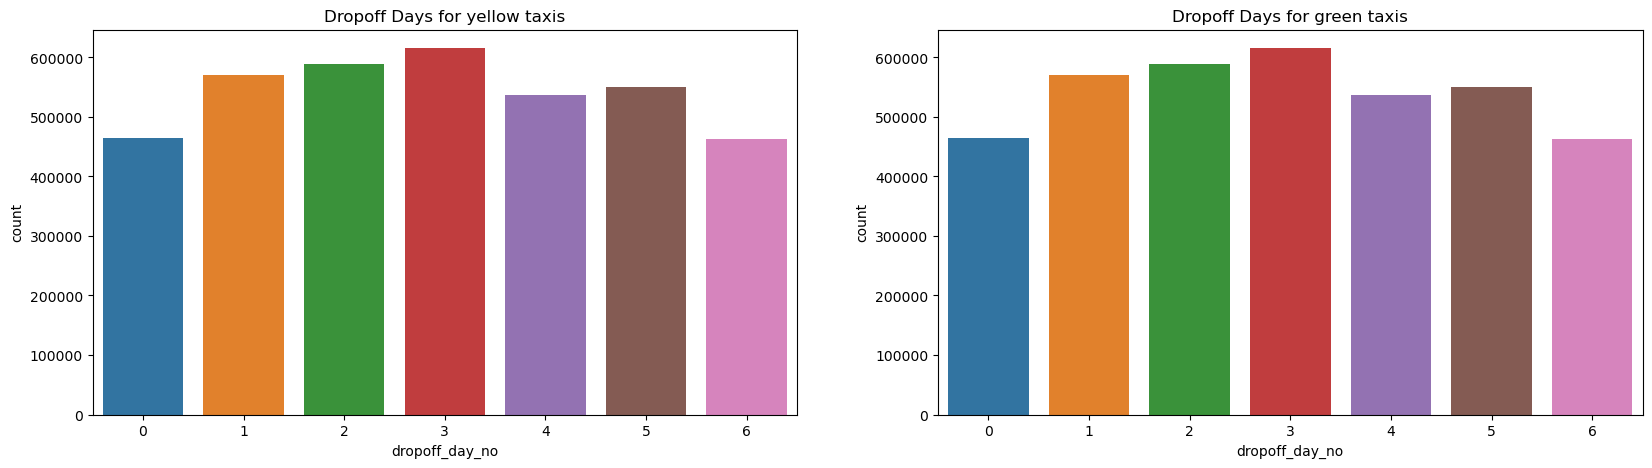

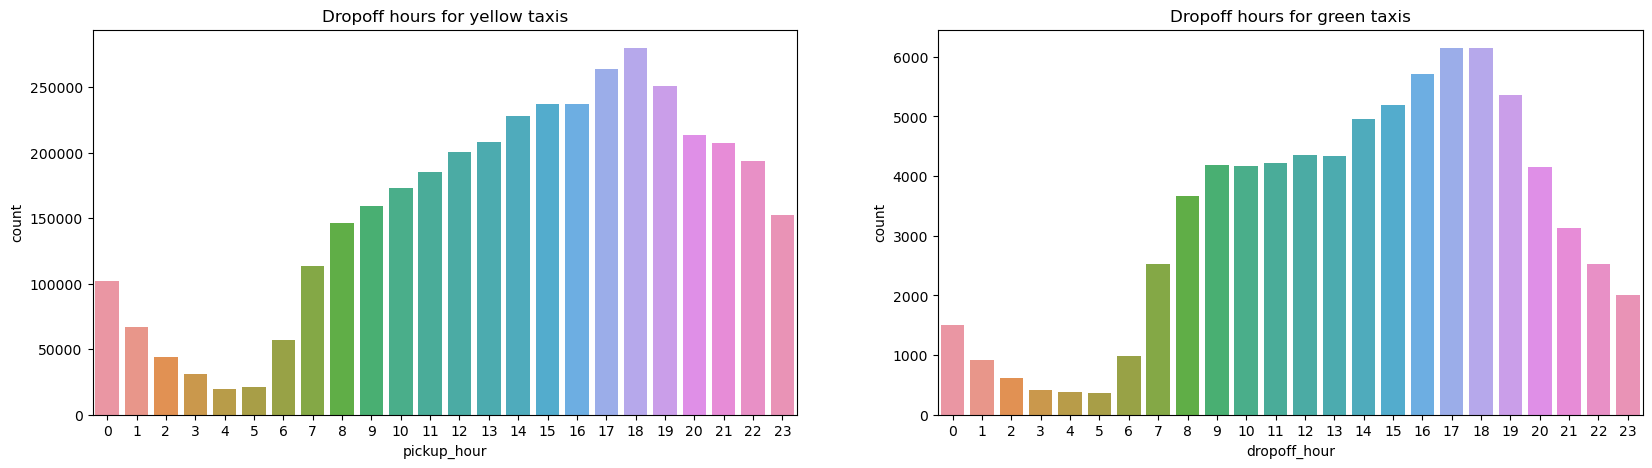

In [18]:
# We wish to have som visual comparison of the distribution between the taxis
# We create a figure that contains 2 plots 1 green 1 yellow
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
# We create the plots
ax1.set_title('Dropoff Days for yellow taxis')
ax=sns.countplot(x="dropoff_day_no",data=df_yellow,ax=ax1)
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tues','Wednes','Thurs','Fri','Satur','Sun'])
ax2.set_title('Dropoff Days for green taxis')
ax=sns.countplot(x="dropoff_day_no",data=df_yellow,ax=ax2)

# we wish to create a figure that cointains the distribution of the taxis sortedd by hours
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Dropoff hours for yellow taxis')
ax=sns.countplot(x="pickup_hour",data=df_yellow,ax=ax3)
ax4.set_title('Dropoff hours for green taxis')
ax=sns.countplot(x="dropoff_hour",data=df_green,ax=ax4)

# We wish to visualize the relationship between trip distance and amount of passengers
# It can be observed from the graph that the taxis are busiest during the period tuesday to thursday and 
# the buiestes hours during the period is around the 17th hour

[Text(0, 0, '615734 (16%)'),
 Text(0, 0, '588727 (16%)'),
 Text(0, 0, '569990 (15%)'),
 Text(0, 0, '550798 (15%)'),
 Text(0, 0, '536698 (14%)'),
 Text(0, 0, '465007 (12%)'),
 Text(0, 0, '462969 (12%)')]

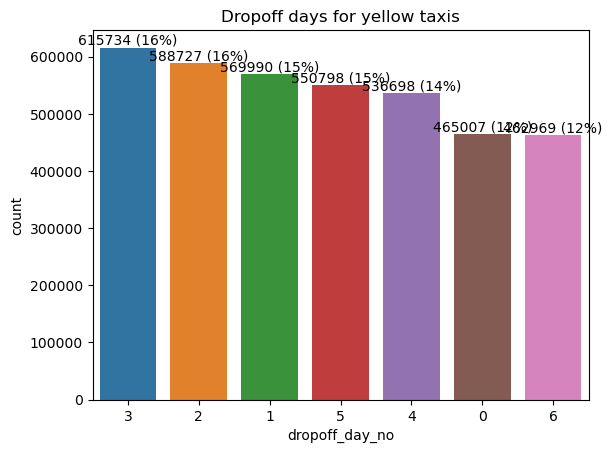

In [19]:
# We wish to observe the distribution of the days in procentages

ax = sns.countplot(x=df_yellow['dropoff_day_no'],
                   order=df_yellow['dropoff_day_no'].value_counts(ascending=False).index); 
abs_values = df_yellow['dropoff_day_no'].value_counts(ascending=False)
rel_values = df_yellow['dropoff_day_no'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.set_title('Dropoff days for yellow taxis')
ax.bar_label(container=ax.containers[0], labels=lbls)
# We can see that there is a large gap between monday and sunday and the other days 

[Text(0, 0, '13152 (17%)'),
 Text(0, 0, '12706 (16%)'),
 Text(0, 0, '12159 (16%)'),
 Text(0, 0, '11499 (15%)'),
 Text(0, 0, '10363 (13%)'),
 Text(0, 0, '9980 (13%)'),
 Text(0, 0, '8141 (10%)')]

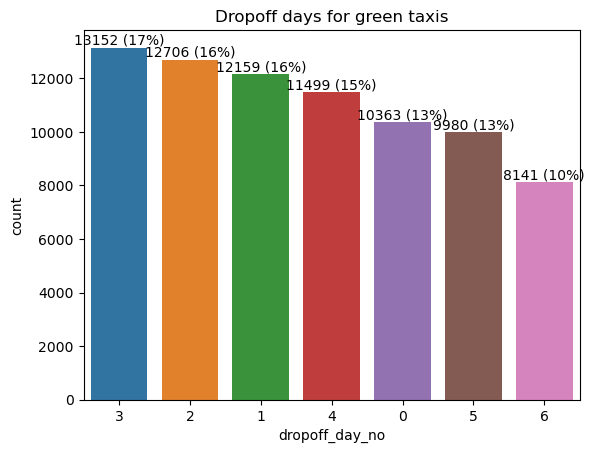

In [20]:
# We wish to observe the distribution of the days in procentages
ax = sns.countplot(x=df_green['dropoff_day_no'],
                   order=df_green['dropoff_day_no'].value_counts(ascending=False).index);
        
abs_values = df_green['dropoff_day_no'].value_counts(ascending=False)
rel_values = df_green['dropoff_day_no'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.set_title('Dropoff days for green taxis')
ax.bar_label(container=ax.containers[0], labels=lbls)
# sunday and saturday are the least busy days 

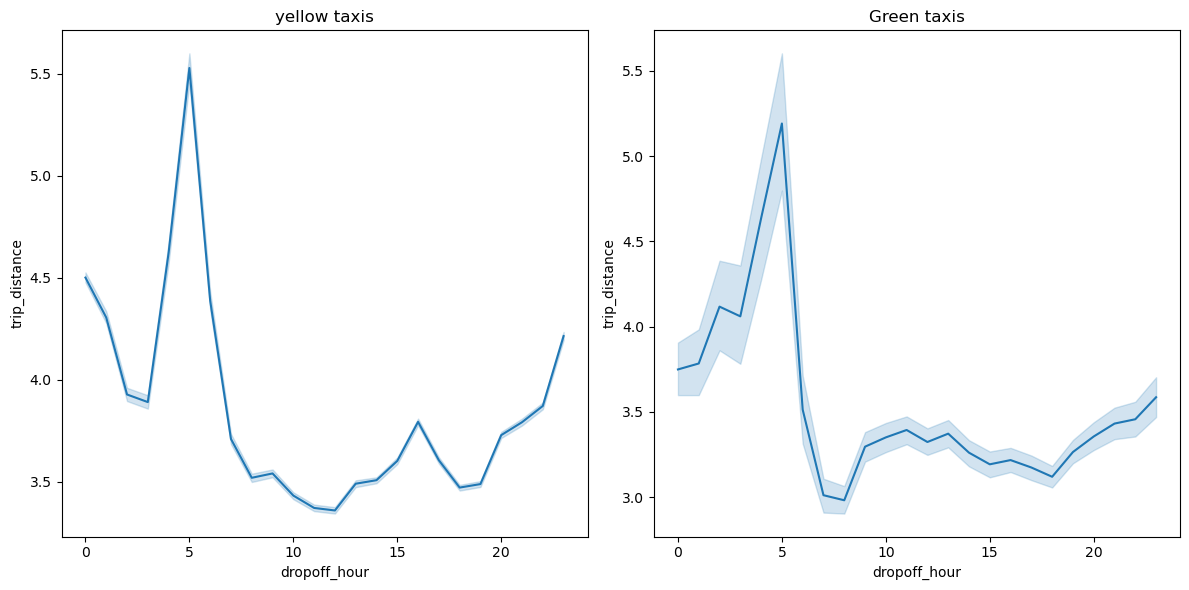

In [21]:
#We wish to observe the patterns between dropoff hour and distance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# yellow taxi plot
sns.lineplot(data=df_yellow, x='dropoff_hour', y='trip_distance', ax=axes[0])
axes[0].set_title('yellow taxis')

# green taxi plot
sns.lineplot(data=df_green, x='dropoff_hour', y='trip_distance', ax=axes[1])
axes[1].set_title('Green taxis')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the figure
plt.show()

it can be observed that the trip distances are longest at 5 o'clock, even though earlier plots have shown
that there is little activity at this time.
It seems that there are few people that need to travel far duing this period which could be explained as
a drunk person wanting to go home after the bars close

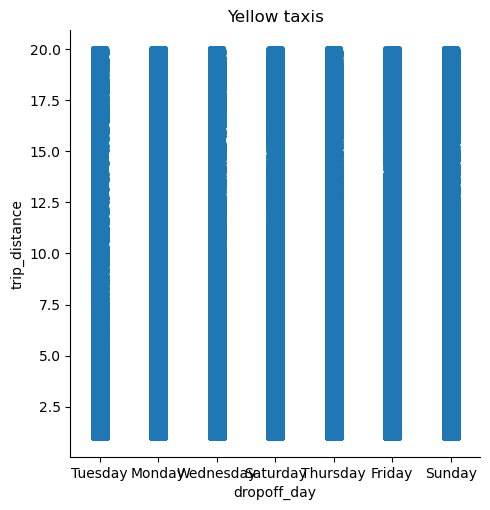

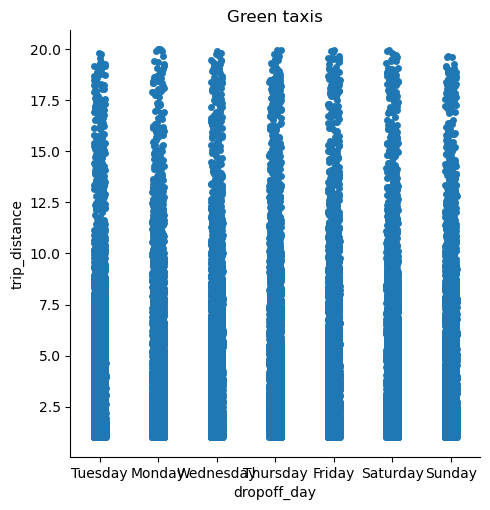

In [22]:
# We wish to observe the distribution of the individual trips sorted by days
sns.catplot(y='trip_distance',x='dropoff_day',data=df_yellow,kind="strip")
ax = plt.gca()
ax.set_title('Yellow taxis')
plt.show()
sns.catplot(y='trip_distance',x='dropoff_day',data=df_green,kind="strip")
ax = plt.gca()
ax.set_title('Green taxis')
plt.show()
# We see after the limits applied upon the data that yellow has around the same density in any given distance on 
# any given day - while almost the same case for the green taxi
# we can observe that there are fewer longer trips 

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
# We wish to create a new dataframe that contains 2 columns that being the weeks and the passenger count
new_df_yellow = df_yellow[['dropoff_week','passenger_count']].copy()
# we create a vector with the value of dropoff
test =(new_df_yellow['dropoff_week'].value_counts())
# We remove any data that exceed the 9 week cap since
test.drop(test[test <10].index, inplace = True)
# We create a new data frame from the test
Q = pd.DataFrame(test)
# We rename it 
Q.rename(columns={'dropoff_week':'PPW'},inplace = True)
# After the sorting process acorrding to the size it can be observed that the first week is not the highest
# therefore we wish to create a vector with the corrsponding weeks 
weeks = (8,7,5,6,4,3,2,9,1)
# we add the vector
Q['newcol'] = weeks
# We sort it with the values according to the week count
Q = Q.sort_values('newcol')
# We create a vector with Dtype - string - since its easier to convert to datetime
weeks2 = ('20210107','20210114','20210121','20210128','20210205','20210212','20210219','20210226','20210302')
Q['newcol'] = weeks2
Q['newcol'] = pd.to_datetime(Q['newcol'])
# we change the name 
Q = Q.rename(columns={'PPW': 'ds','newcol': 'y'})

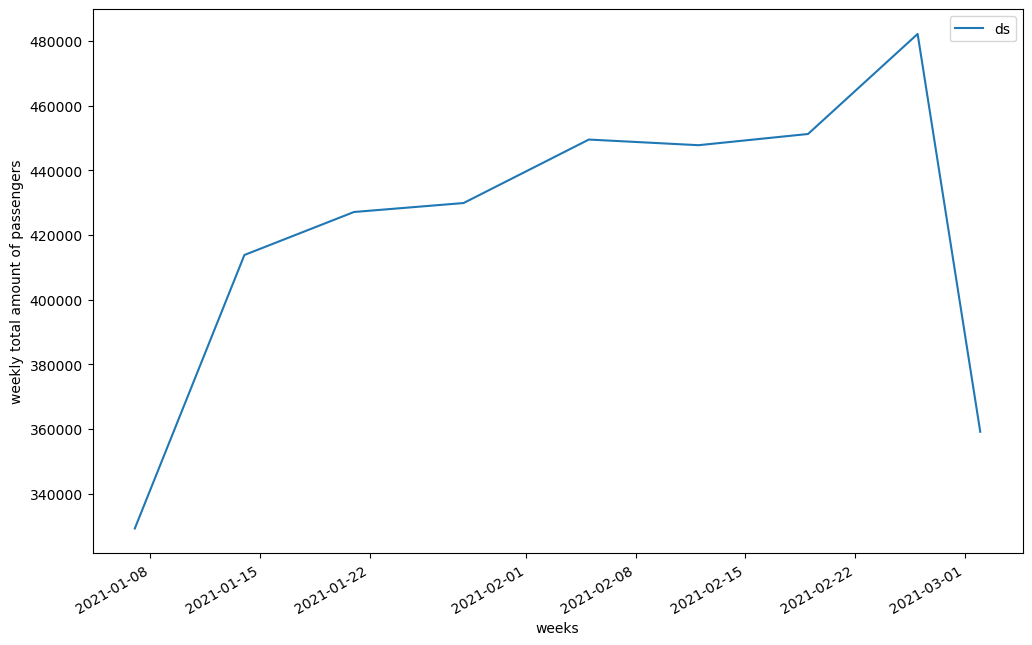

In [ ]:
# We wish to plot the total amount of passengers for each week during the period of 9 weeks
# the reason for the 9 weeks during a 2 month period, which is traditionally viewed as 4 weeks per month, is because
# of different month lengths
ax = Q.set_index('y').plot(figsize=(12, 8))
ax.set_ylabel('weekly total amount of passengers')
ax.set_xlabel('weeks')

plt.show()

10:25:17 - cmdstanpy - INFO - Chain [1] start processing
10:25:17 - cmdstanpy - INFO - Chain [1] done processing


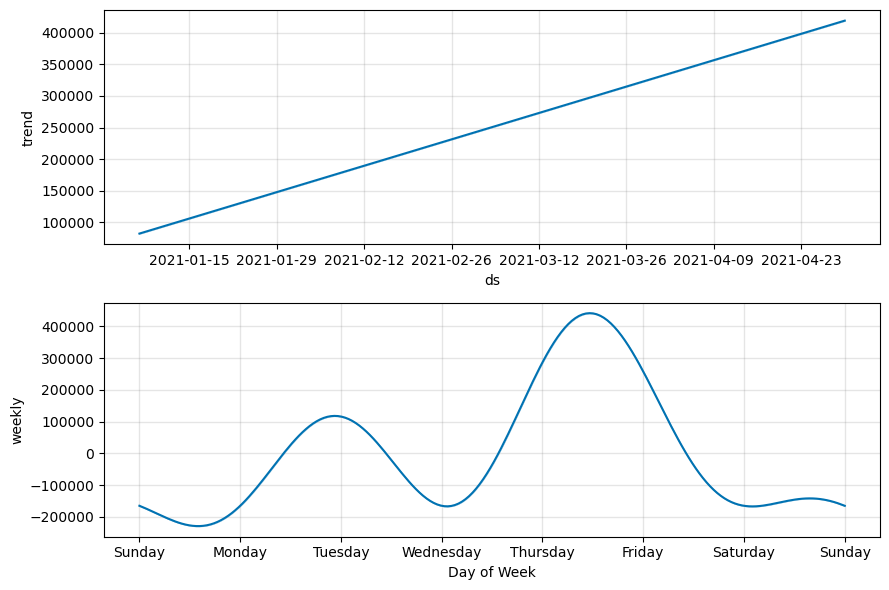

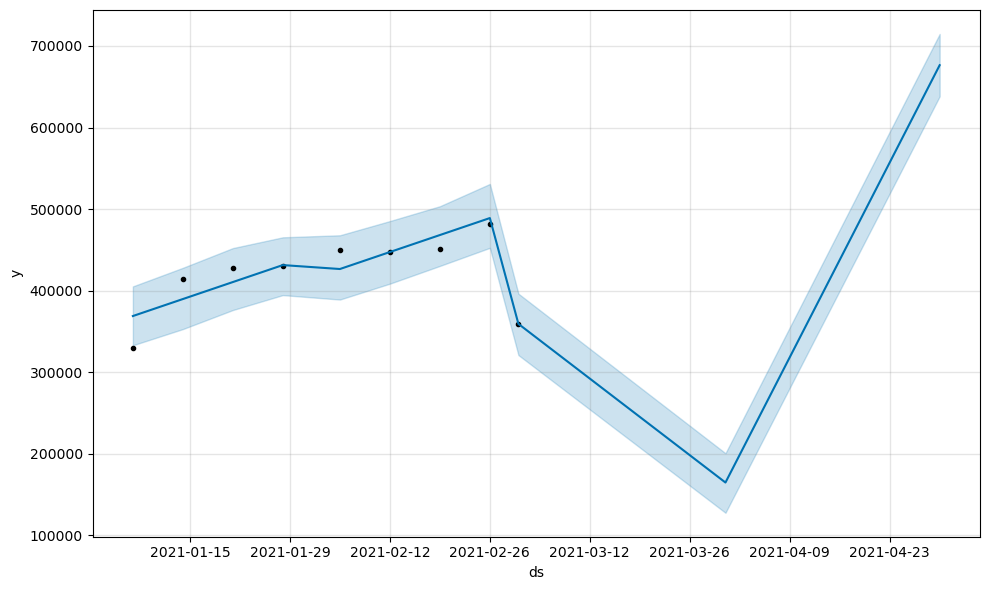

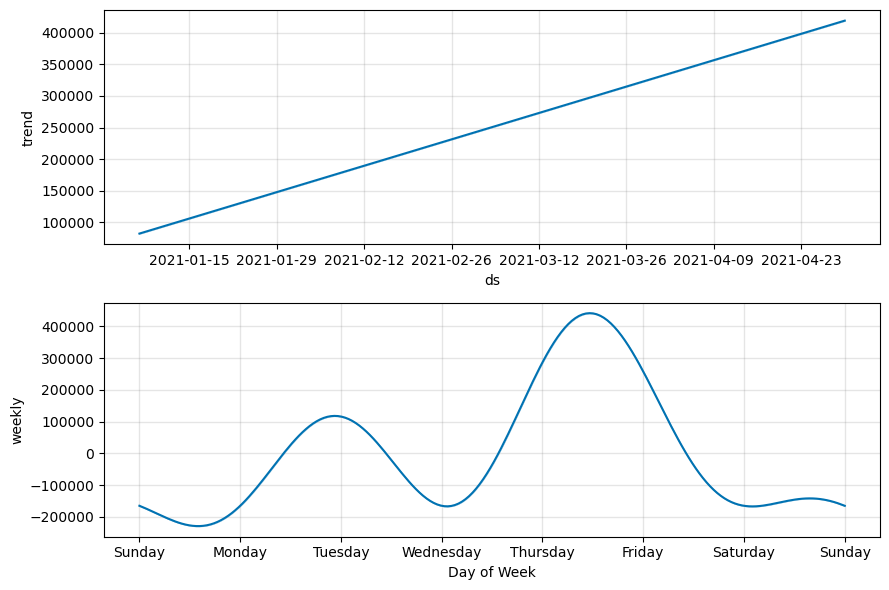

In [ ]:
# We wish to view the trend changes over a longer period with 95% probability
Q = Q.rename(columns={'ds': 'y','y': 'ds'})
my_model = Prophet(interval_width=0.95)
my_model.fit(Q)
# We wish to only view the upcoming 2 months based on the 2 months of data
future_dates = my_model.make_future_dataframe(periods=2, freq='M')
forecast = my_model.predict(future_dates)
# We wish to view the expected, worst and best
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
my_model.plot(forecast, uncertainty=True)
my_model.plot_components(forecast)


The above plot provides interesting insights.

The first plot shows that the monthly volume of yellow taxi passengers has been linearly increasing over time.

The second plot highlights the fact that the weekly count of yellow passengers peaks towards the middle of the week.

The third plot shows the forecast for the upcoming 2 months based on the data of the 2 months data

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

10:25:22 - cmdstanpy - INFO - Chain [1] start processing
10:25:22 - cmdstanpy - INFO - Chain [1] done processing


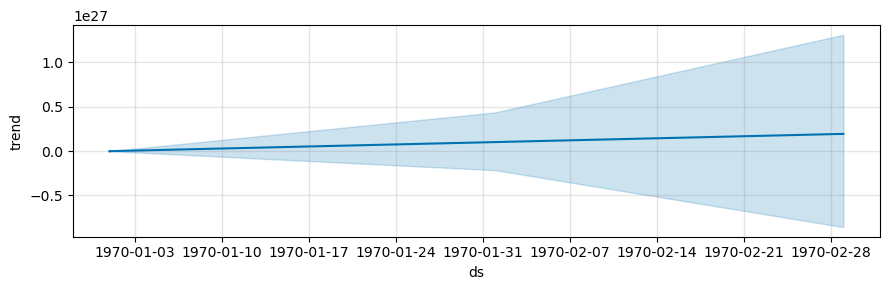

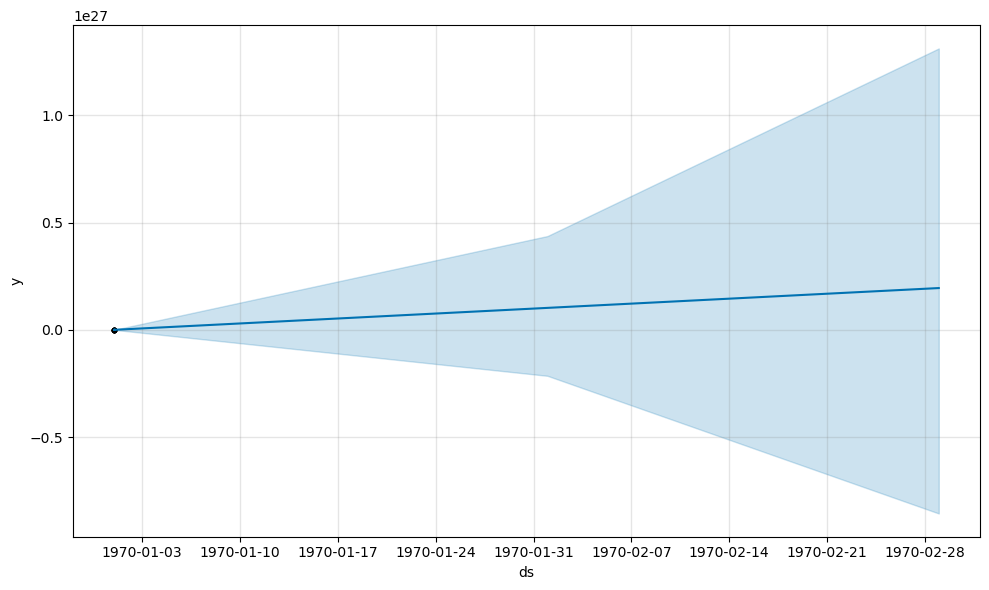

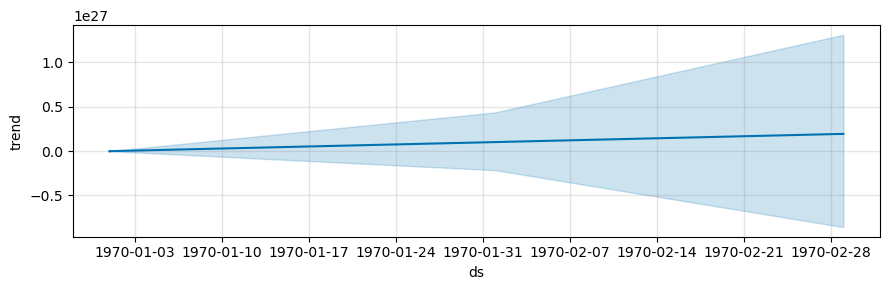

In [ ]:
Q = Q.rename(columns={'ds': 'y','y': 'ds'})
my_model = Prophet(interval_width=0.95)
my_model.fit(Q)
future_dates = my_model.make_future_dataframe(periods=2, freq='MS')
future_dates.head()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
my_model.plot(forecast, uncertainty=True)
my_model.plot_components(forecast)

Above is 3 plots of the trend line with a 95% probability. 
These means that the light blue area is the area that with 95% certainty holds the actually amount during x period.

The first diagram shows the most likely 

The seconds shows the lower

The third shows the upper

Shared between them all is that the average line slowly increases during the period which indicates that there is a larger need/use for the taxis in the future.

If we make the same graphs for green taxi, we would get the same conclusion.

In [ ]:
# We repeat this process for green taxi
new_df_green = df_green[['dropoff_week','passenger_count']].copy()
new_df_green.value_counts()
test =(new_df_green['dropoff_week'].value_counts())
test.drop(test[test <10].index, inplace = True)
Q = pd.DataFrame(test)
Q.rename(columns={'dropoff_week':'PPW'},inplace = True)
weeks = (8,7,5,6,4,3,2,9,1)
Q['newcol'] = weeks
Q = Q.sort_values('newcol')
weeks2 = ('20210107','20210114','20210121','20210128','20210205','20210212','20210219','20210226','20210302')
Q['newcol'] = weeks2
Q['newcol'] = pd.to_datetime(Q['newcol'])
Q = Q.rename(columns={'PPW': 'ds','newcol': 'y'})
Q

ds          y
13  6616 2021-01-07
6   8868 2021-01-14
11  8882 2021-01-21
8   8993 2021-01-28
10  9204 2021-02-05
9   9017 2021-02-12
7   9403 2021-02-19
12  9474 2021-02-26
5   7532 2021-03-02

10:25:25 - cmdstanpy - INFO - Chain [1] start processing
10:25:25 - cmdstanpy - INFO - Chain [1] done processing


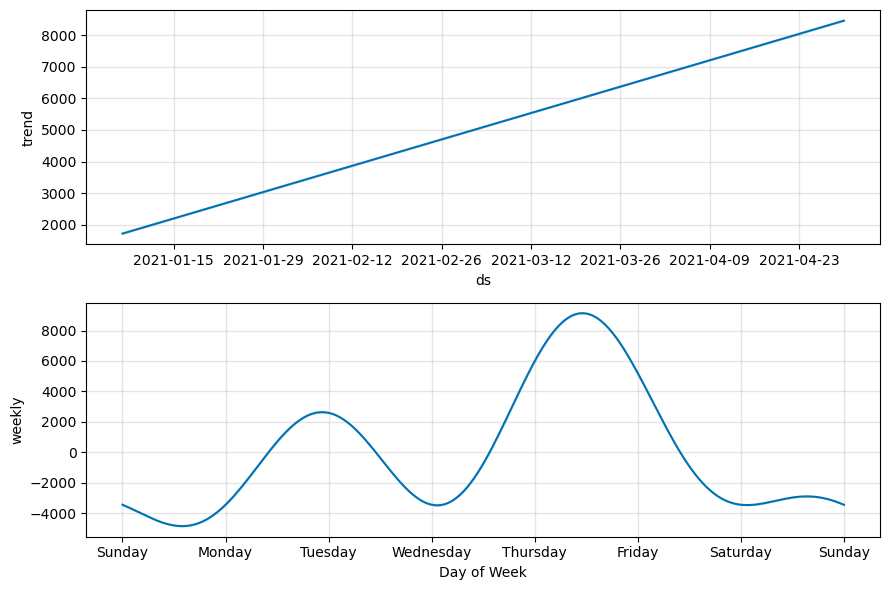

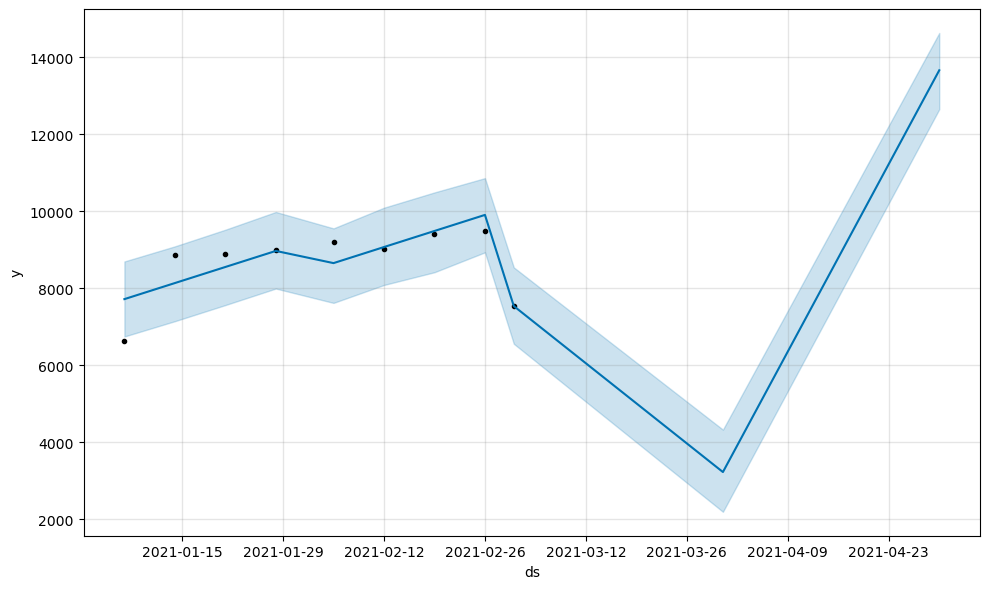

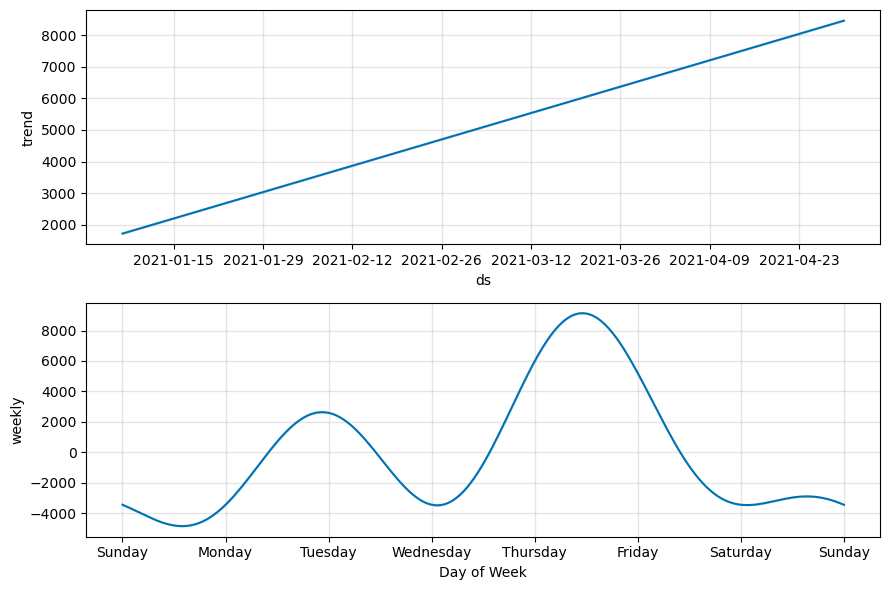

In [ ]:
Q = Q.rename(columns={'ds': 'y','y': 'ds'})
my_model = Prophet(interval_width=0.95)
my_model.fit(Q)
future_dates = my_model.make_future_dataframe(periods=2, freq='M')
future_dates.head()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
my_model.plot(forecast, uncertainty=True)
my_model.plot_components(forecast)

10:25:28 - cmdstanpy - INFO - Chain [1] start processing
10:25:28 - cmdstanpy - INFO - Chain [1] done processing


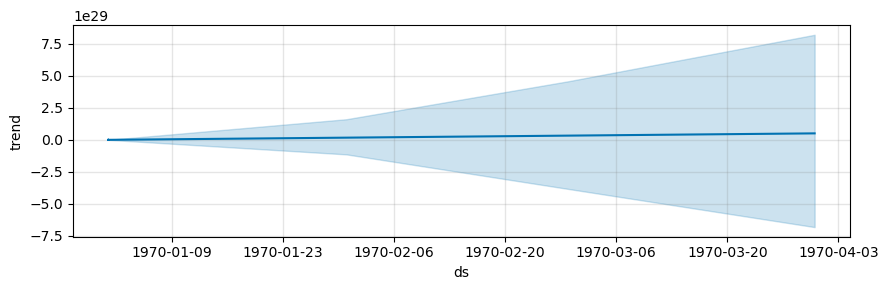

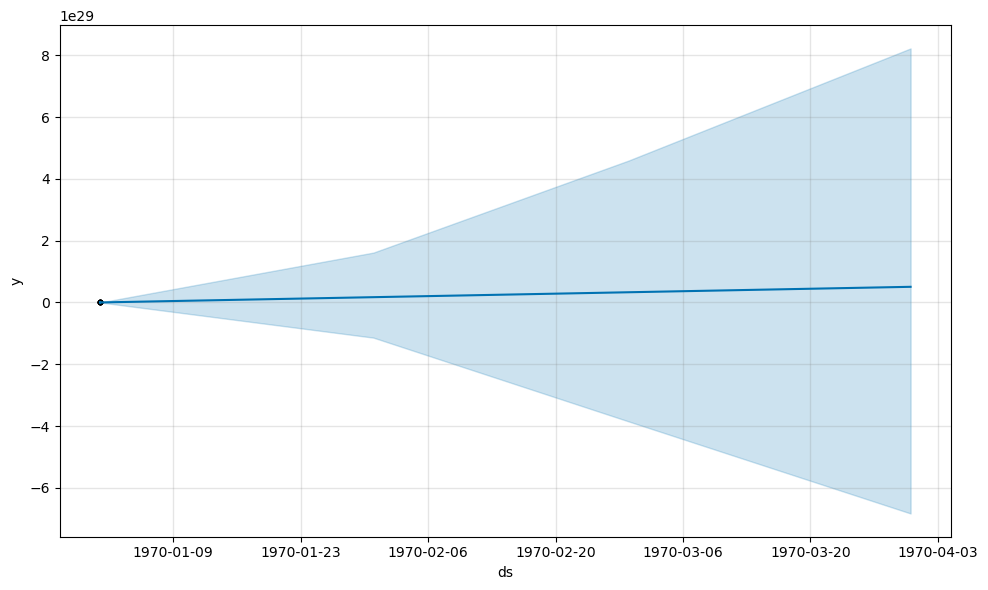

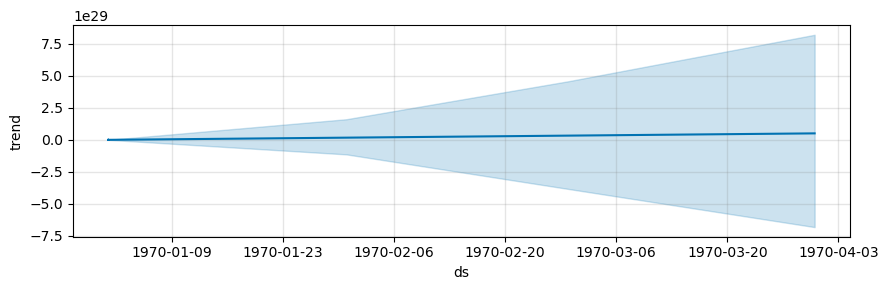

In [ ]:
Q = Q.rename(columns={'ds': 'y','y': 'ds'})
my_model = Prophet(interval_width=0.95)
my_model.fit(Q)
future_dates = my_model.make_future_dataframe(periods=3, freq='M')
future_dates.head()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
my_model.plot(forecast, uncertainty=True)
my_model.plot_components(forecast)

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.